In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
train = pd.read_csv("train.csv").set_index("id")
test = pd.read_csv("test.csv").set_index("id")

In [13]:
train.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [14]:
train.head(5).T

id,0,1,2,3,4
X_Minimum,584.0000,808.0000,3.900000e+01,7.810000e+02,1540.0000
X_Maximum,590.0000,816.0000,1.920000e+02,7.890000e+02,1560.0000
Y_Minimum,909972.0000,728350.0000,2.212076e+06,3.353146e+06,618457.0000
Y_Maximum,909977.0000,728372.0000,2.212144e+06,3.353173e+06,618502.0000
Pixels_Areas,16.0000,433.0000,1.138800e+04,2.100000e+02,521.0000
X_Perimeter,8.0000,20.0000,7.050000e+02,1.600000e+01,72.0000
Y_Perimeter,5.0000,54.0000,4.200000e+02,2.900000e+01,67.0000
Sum_of_Luminosity,2274.0000,44478.0000,1.311391e+06,3.202000e+03,48231.0000
Minimum_of_Luminosity,113.0000,70.0000,2.900000e+01,1.140000e+02,82.0000
Maximum_of_Luminosity,140.0000,111.0000,1.410000e+02,1.340000e+02,111.0000


In [15]:
target_classes = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
targets_bin = train[target_classes]

train = train.drop(target_classes, axis="columns")

In [16]:
targets_bin.sum(axis=0)

Pastry          1466
Z_Scratch       1150
K_Scatch        3432
Stains           568
Dirtiness        485
Bumps           4763
Other_Faults    6558
dtype: int64

In [17]:
targets_bin.sum(axis=1).value_counts()

1    18380
0      818
2       21
Name: count, dtype: int64

In [18]:
targets_bin[targets_bin.sum(axis=1)==2]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,
634,0,0,1,0,0,0,1
752,0,0,1,0,0,0,1
3572,0,0,1,0,0,1,0
4416,0,0,1,0,0,0,1
4530,0,0,1,0,0,0,1
4664,0,0,1,0,0,0,1
6448,0,0,1,0,0,0,1
7589,0,0,1,0,0,0,1
8075,0,0,1,0,0,0,1


In [19]:
target_classes = ["Zero_Defects", "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]


In [20]:
target = targets_bin@(np.arange(targets_bin.shape[1]) + 1)
target[targets_bin.sum(axis=1)==2] = 3

In [21]:
target.value_counts() / len(target)

7    0.340288
6    0.247724
3    0.178573
1    0.076227
2    0.059837
0    0.042562
4    0.029554
5    0.025235
Name: count, dtype: float64

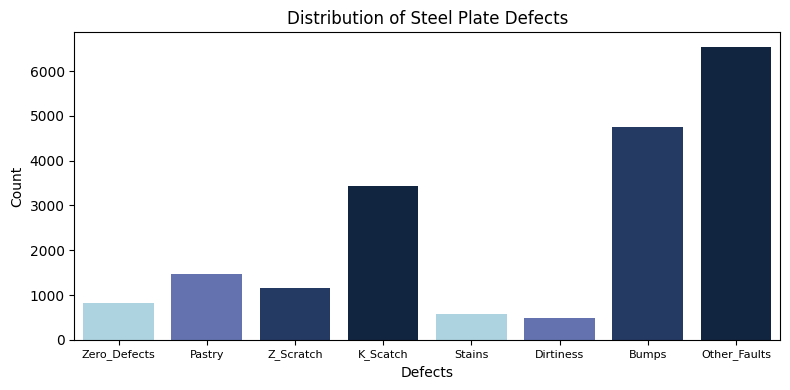

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0B2447"]
cmap_custom = ListedColormap(color_list)

plt.figure(figsize=(8, 4))
ax = sns.countplot(x=target, palette=color_list)
ax.set_xticklabels(target_classes) 

plt.title('Distribution of Steel Plate Defects')
plt.xlabel('Defects')
plt.ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=8)
plt.tight_layout() 
plt.show()

In [23]:
train.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [24]:
train.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
dtype: object

In [25]:
train.nunique()

X_Minimum                1191
X_Maximum                1259
Y_Minimum                3345
Y_Maximum                3341
Pixels_Areas             1154
X_Perimeter               460
Y_Perimeter               331
Sum_of_Luminosity        2595
Minimum_of_Luminosity     162
Maximum_of_Luminosity      98
Length_of_Conveyer         99
TypeOfSteel_A300            2
TypeOfSteel_A400            2
Steel_Plate_Thickness      27
Edges_Index              1849
Empty_Index              1748
Square_Index             1118
Outside_X_Index           525
Edges_X_Index            1102
Edges_Y_Index             900
Outside_Global_Index        4
LogOfAreas               1072
Log_X_Index               206
Log_Y_Index               241
Orientation_Index        1598
Luminosity_Index         2046
SigmoidOfAreas            467
dtype: int64

In [26]:
train.TypeOfSteel_A300.value_counts()

TypeOfSteel_A300
0    11480
1     7739
Name: count, dtype: int64

In [27]:
train.TypeOfSteel_A400.value_counts()

TypeOfSteel_A400
1    11461
0     7758
Name: count, dtype: int64

In [28]:
train.Steel_Plate_Thickness.value_counts()

Steel_Plate_Thickness
40     7625
70     3703
80     1661
100    1433
50     1011
60      856
200     748
300     434
175     396
69      283
90      211
150     191
120     164
143     138
185     116
220     105
130      44
125      24
85       21
211      18
290      11
250       8
140       8
180       7
159       1
81        1
86        1
Name: count, dtype: int64

In [29]:
train.Outside_Global_Index.value_counts()

Outside_Global_Index
1.0    11022
0.0     7490
0.5      706
0.7        1
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


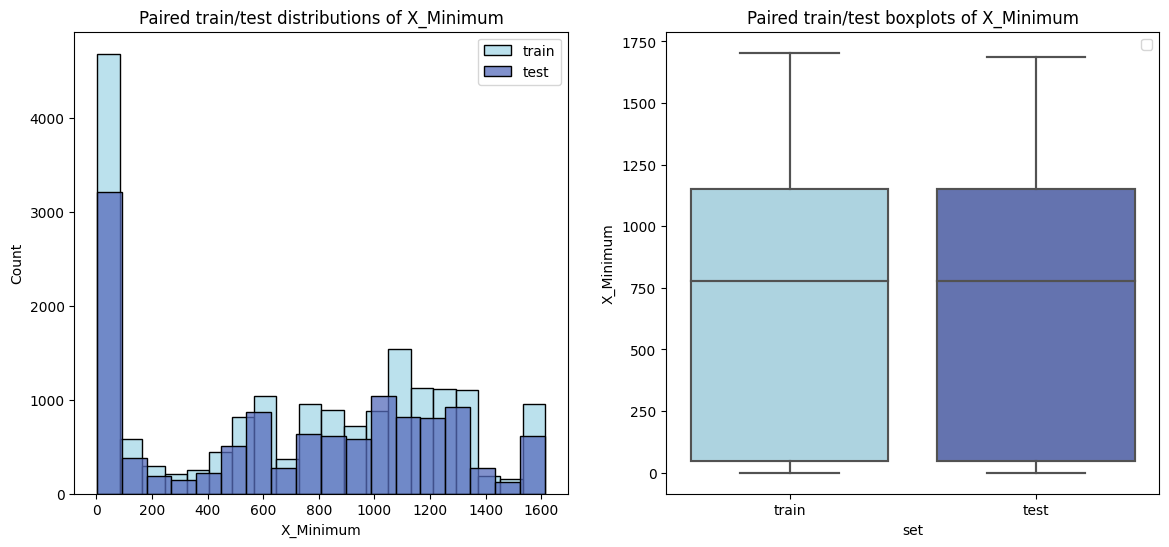

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


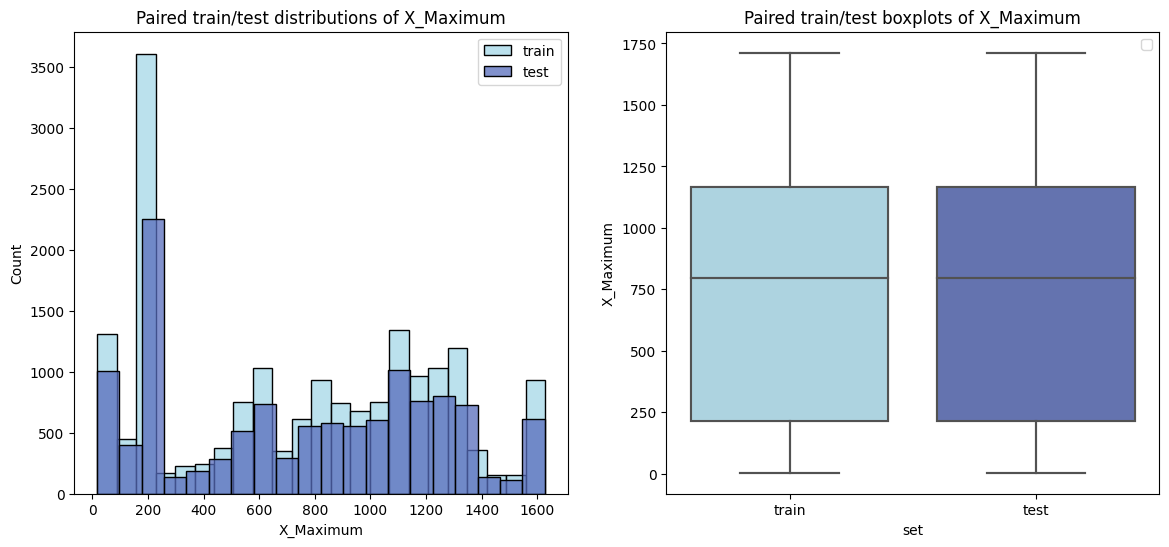

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


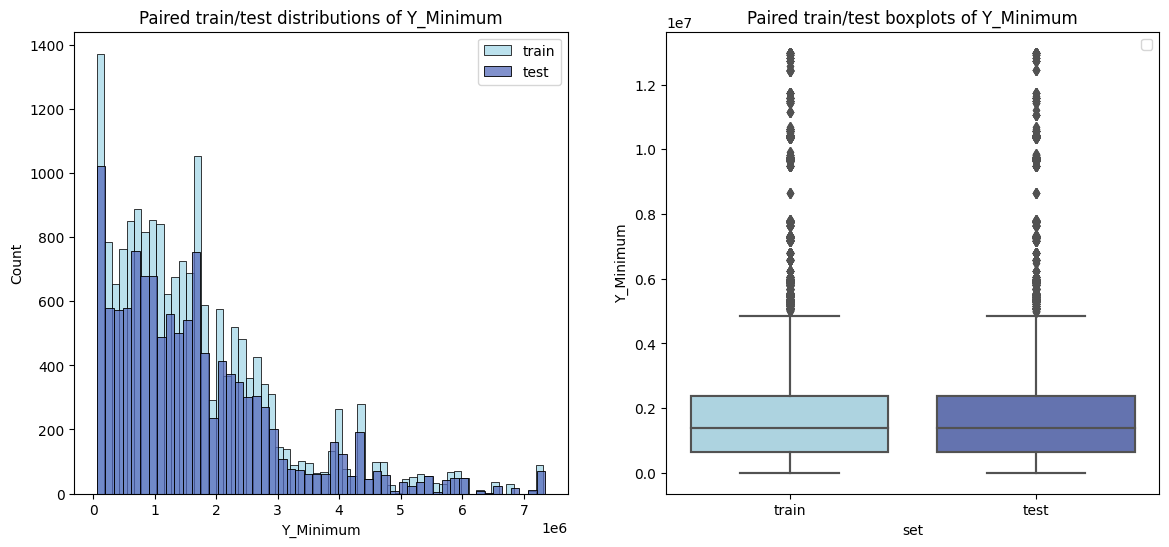

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


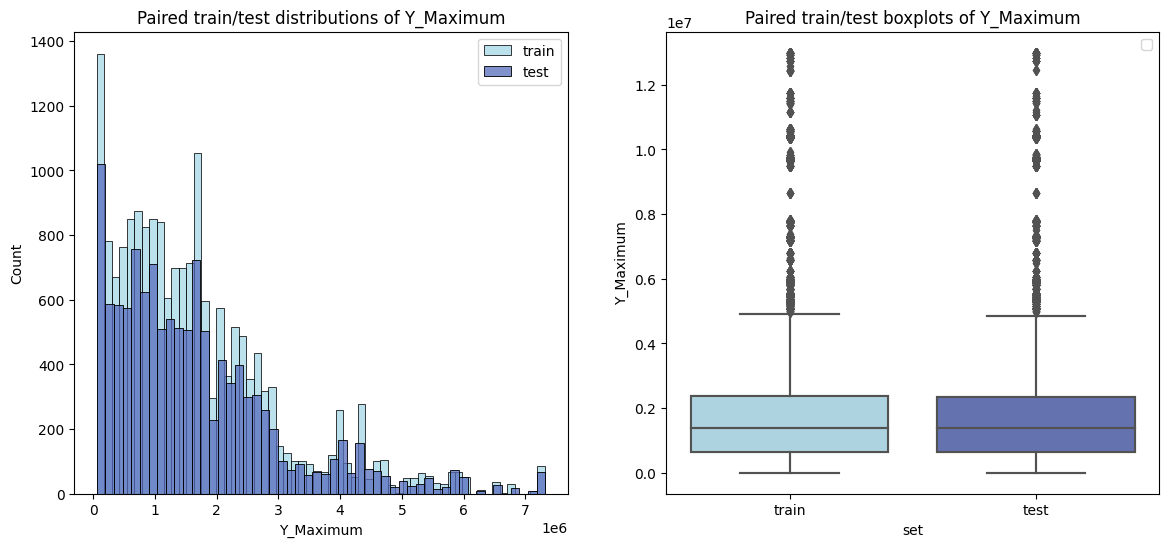

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


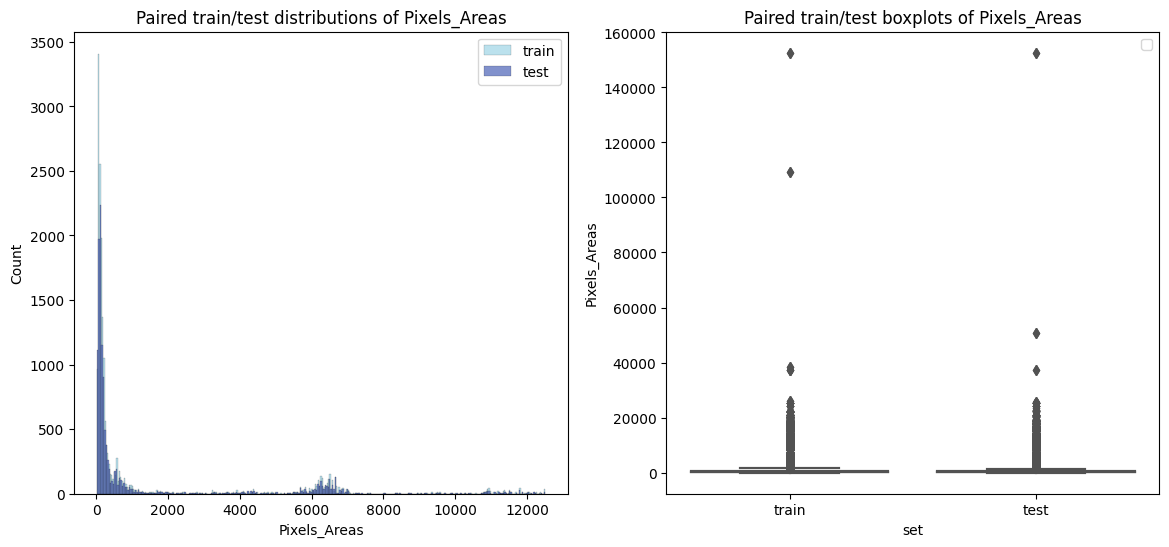

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


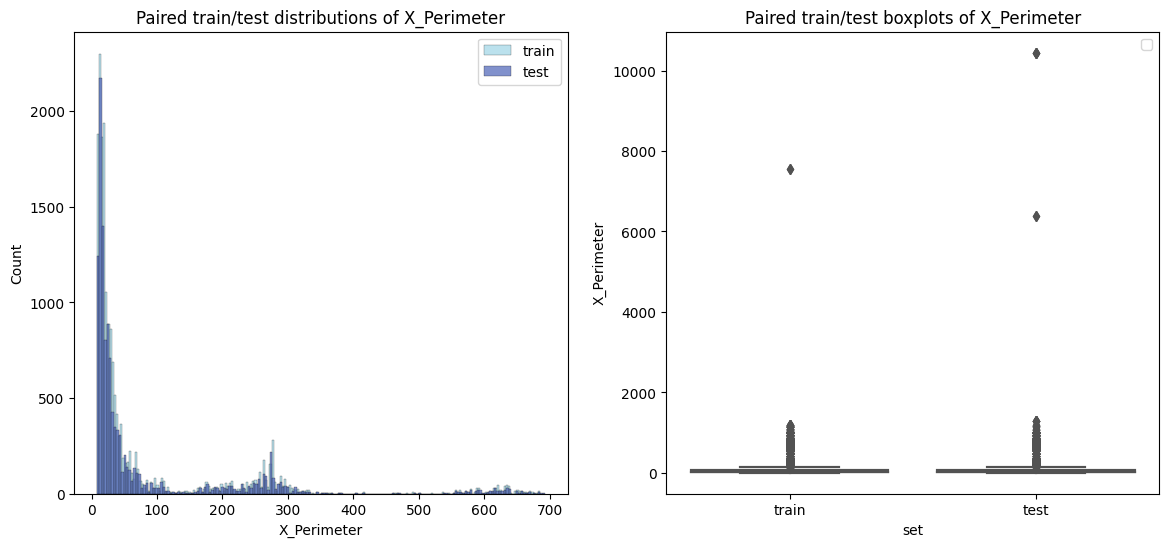

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


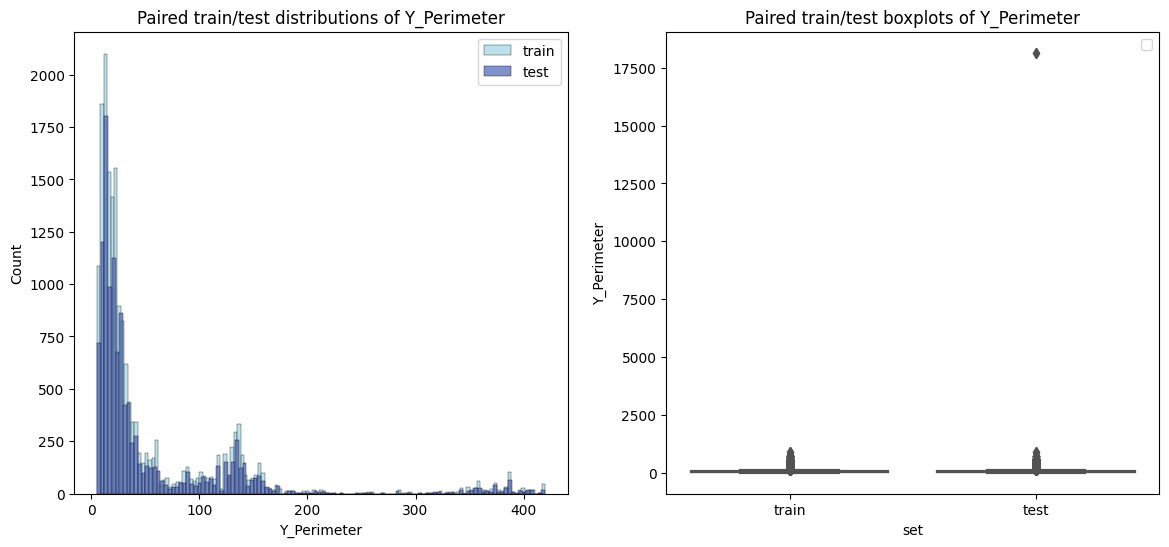

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


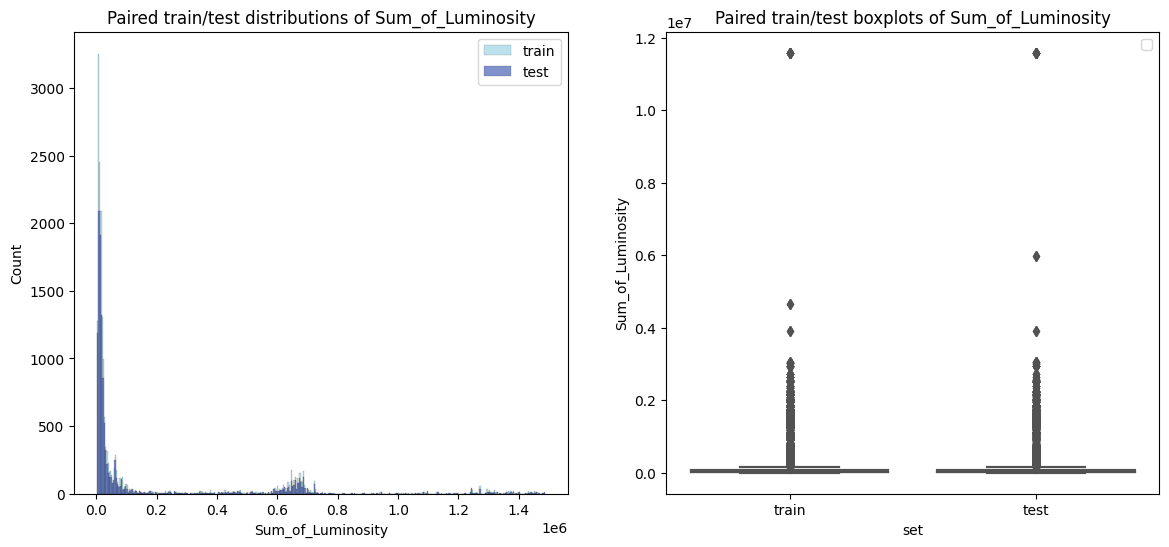

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


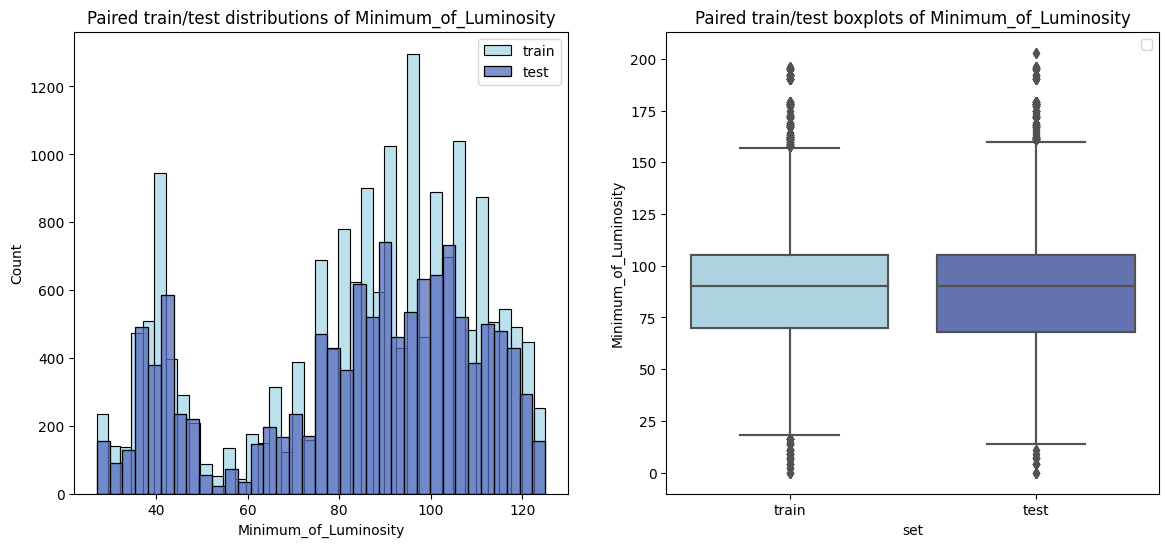

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


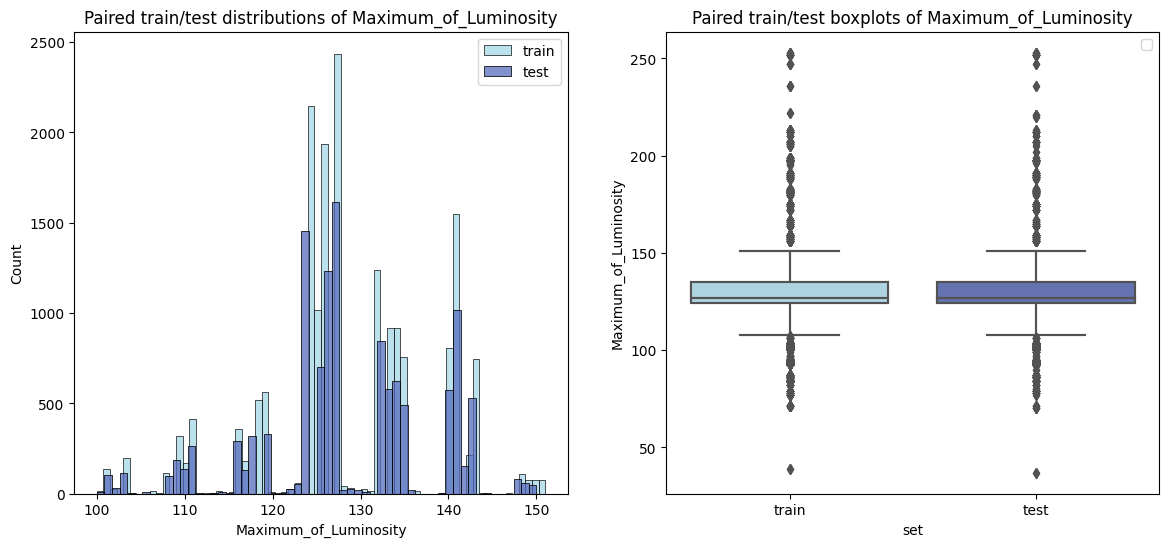

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


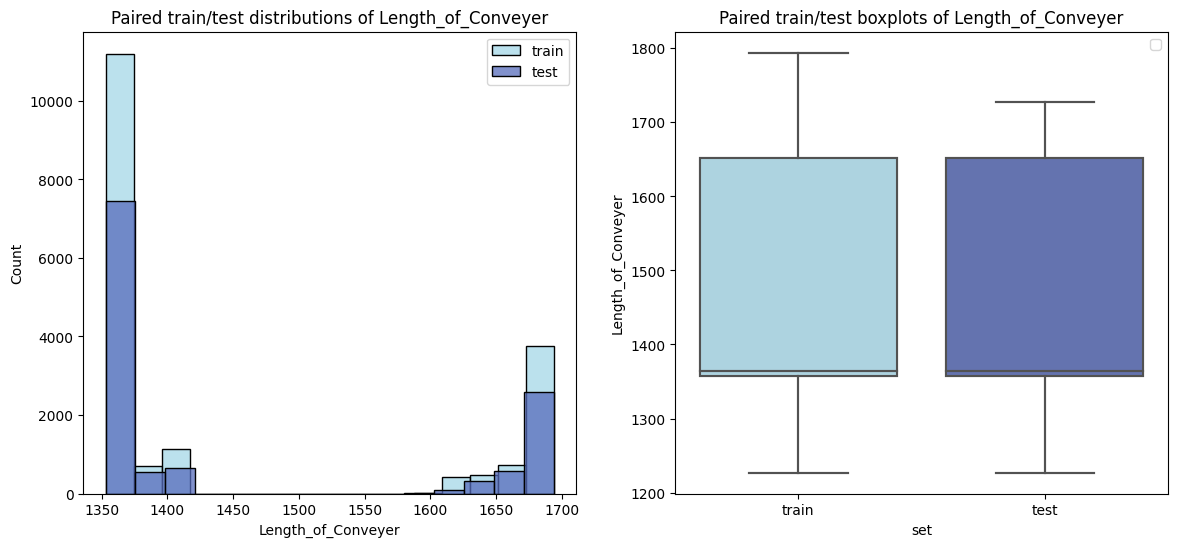

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


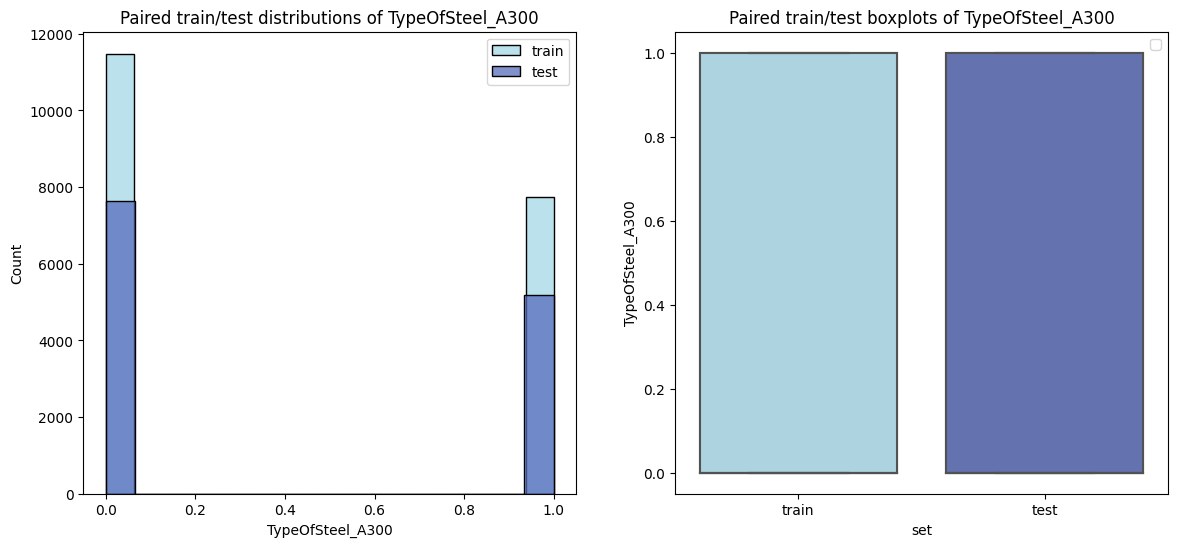

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


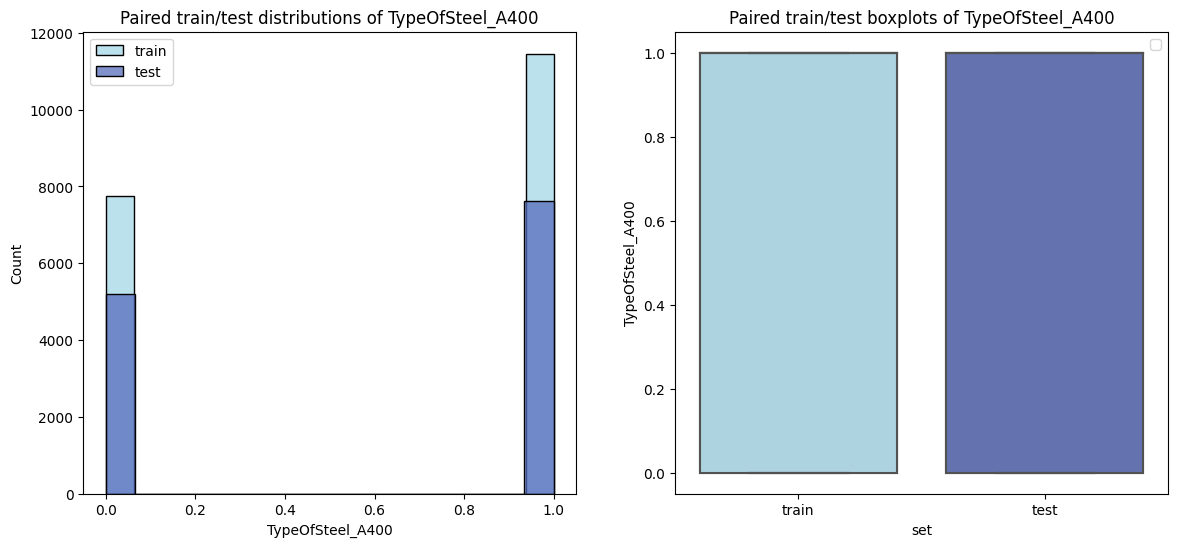

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


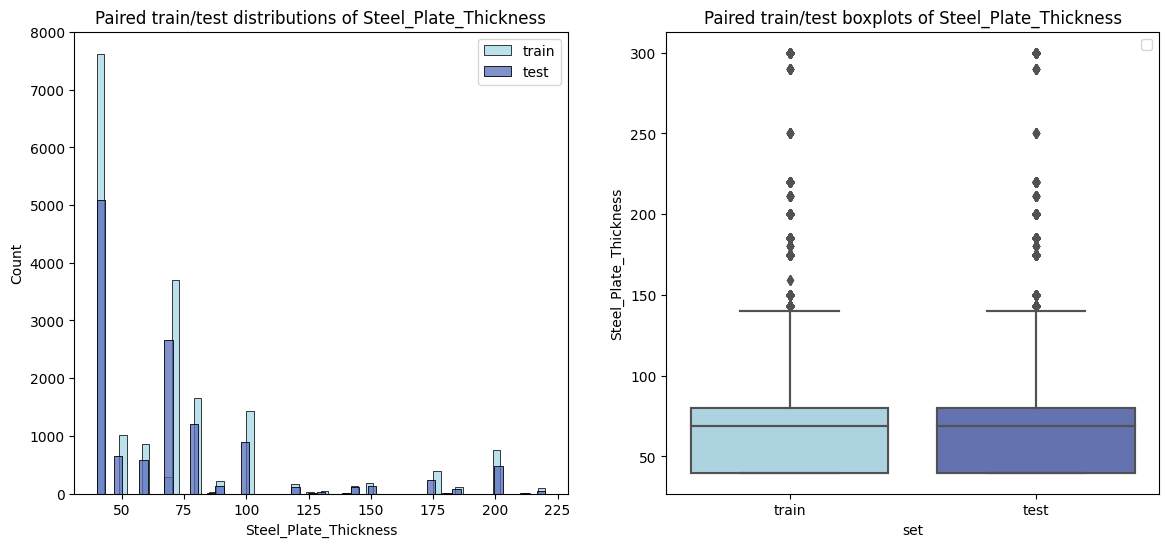

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


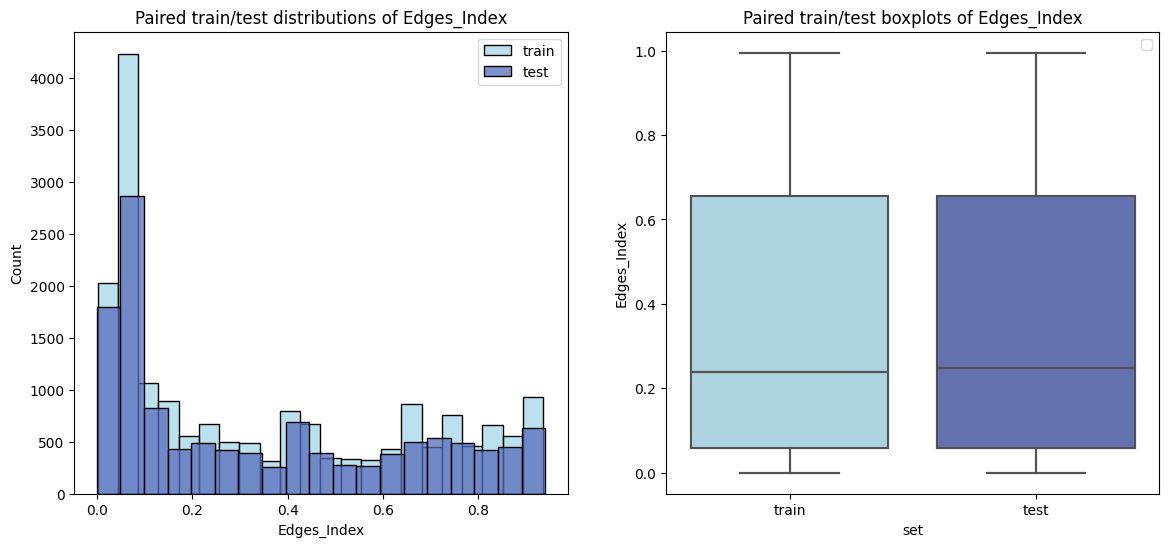

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


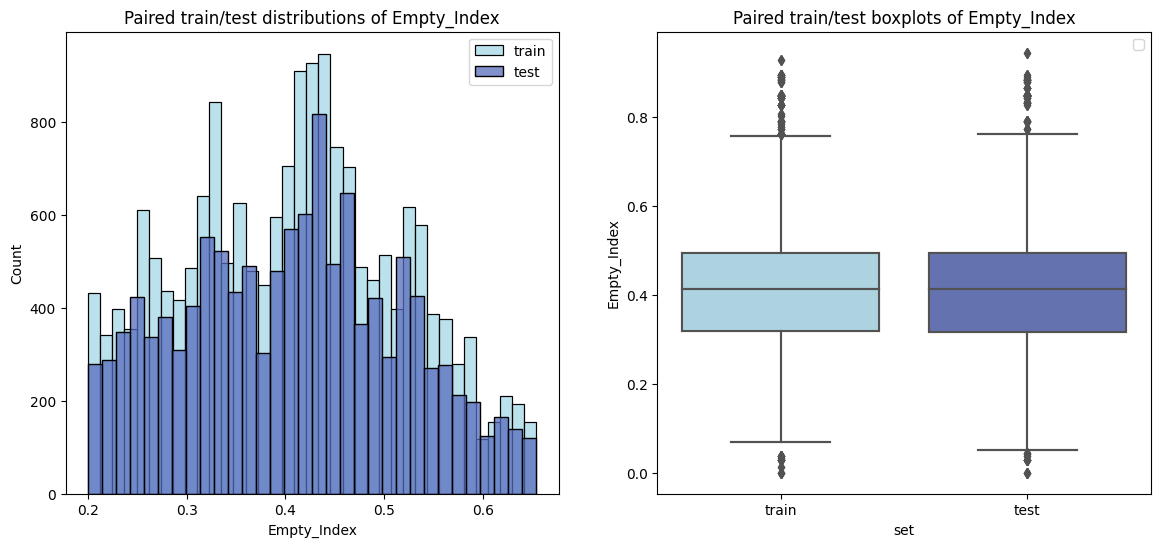

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


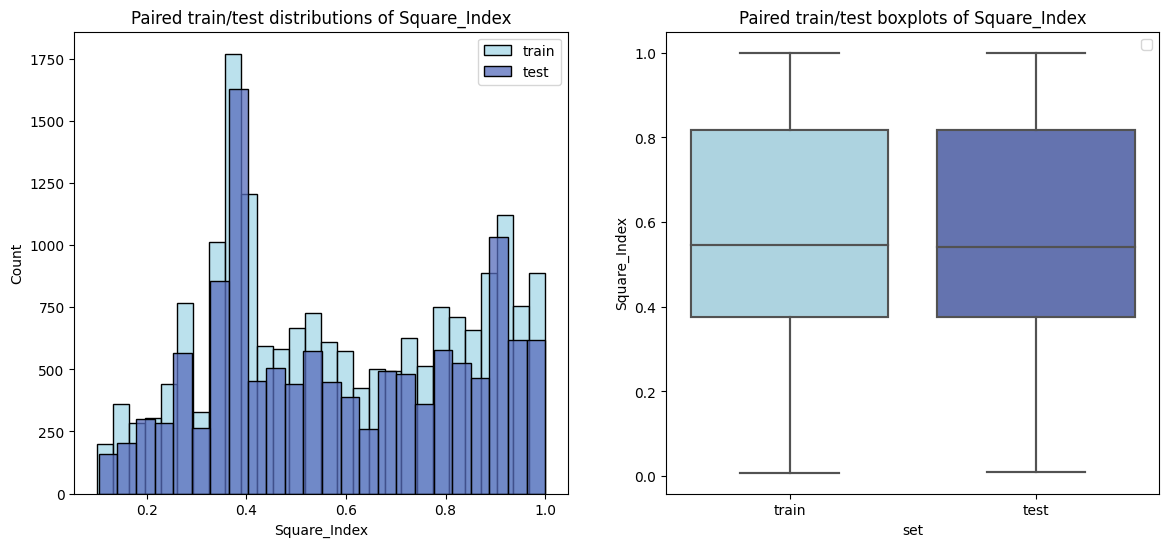

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


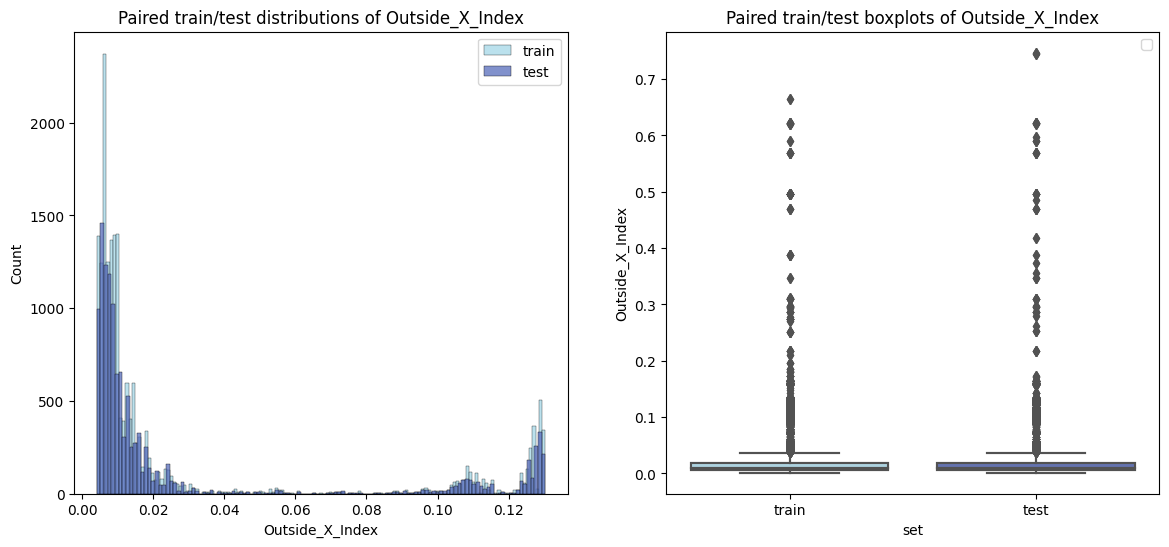

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


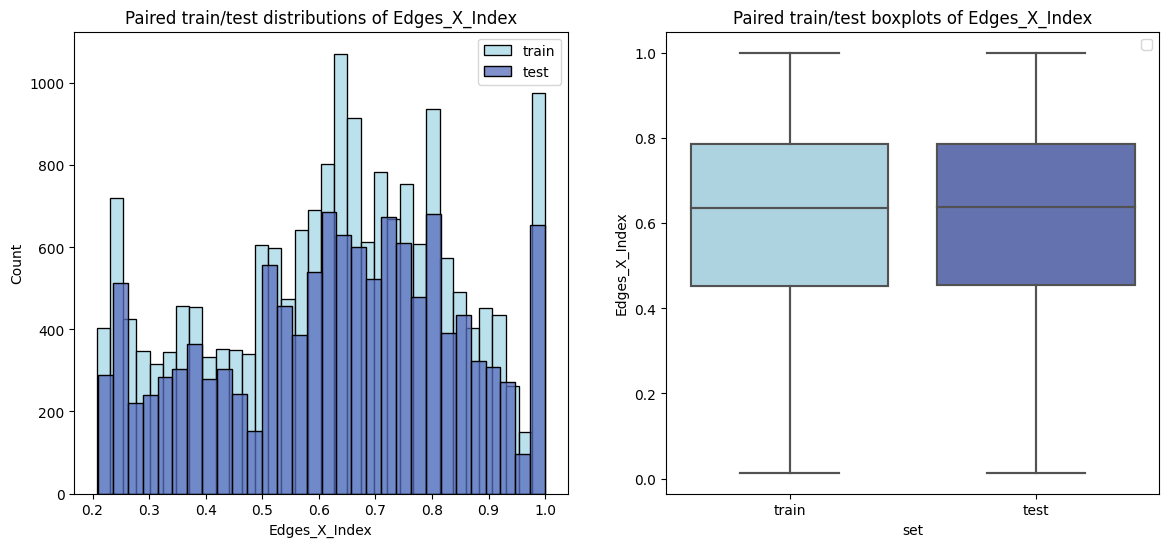

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


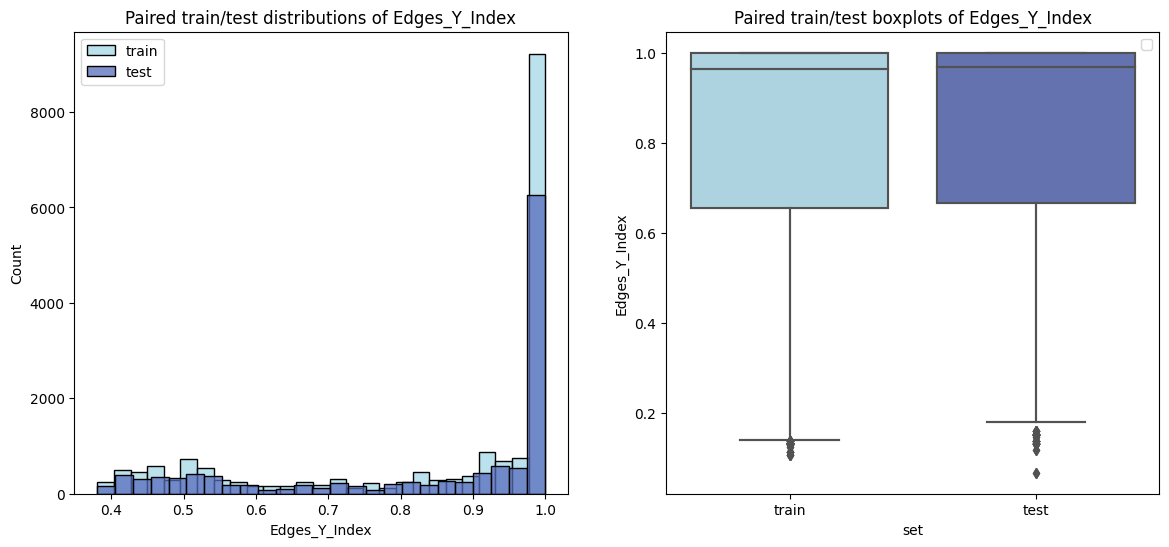

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


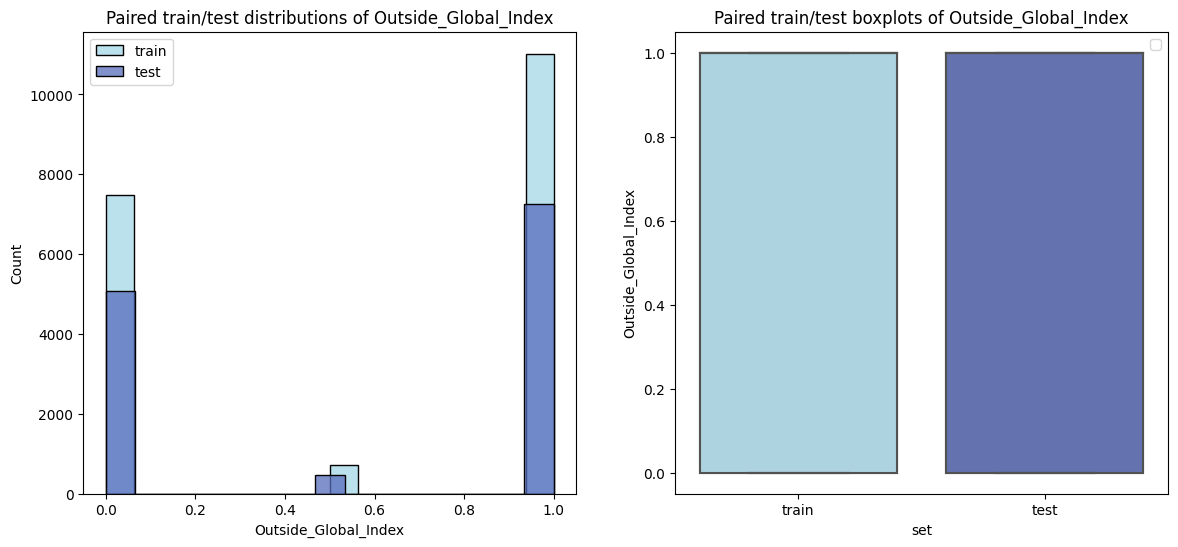

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


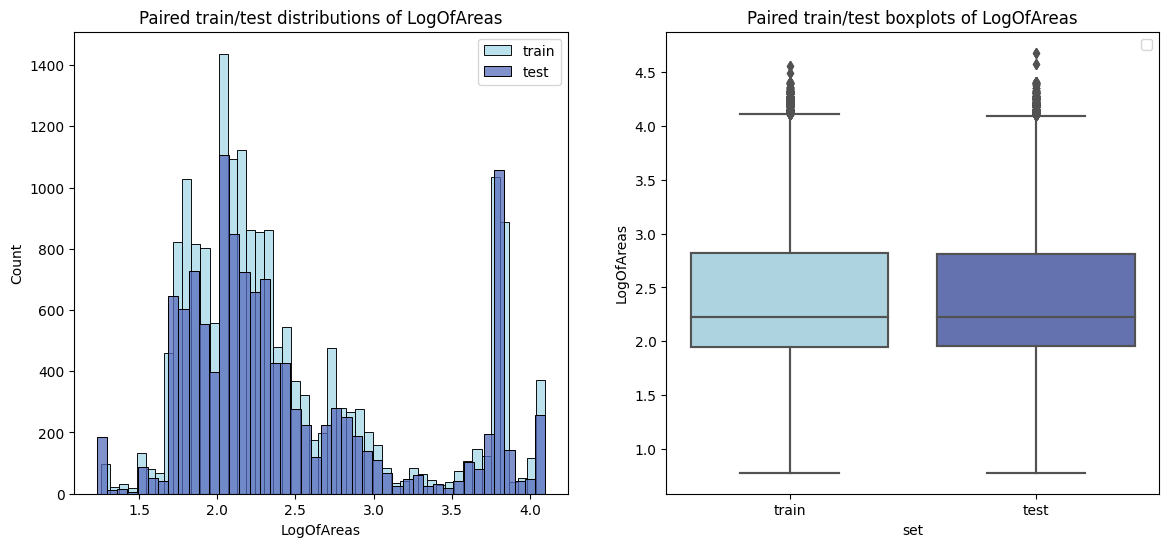

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


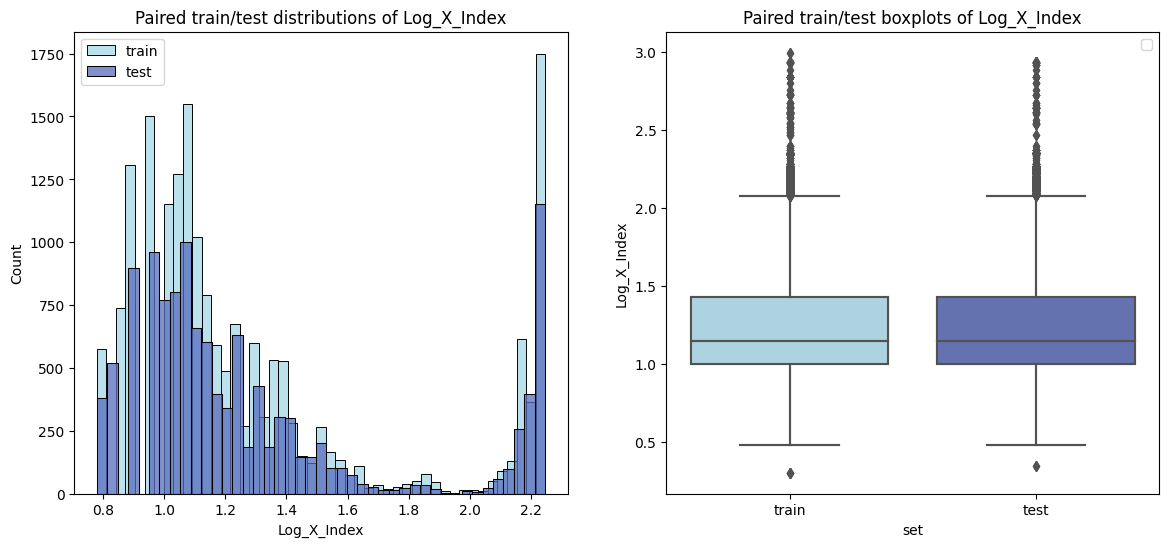

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


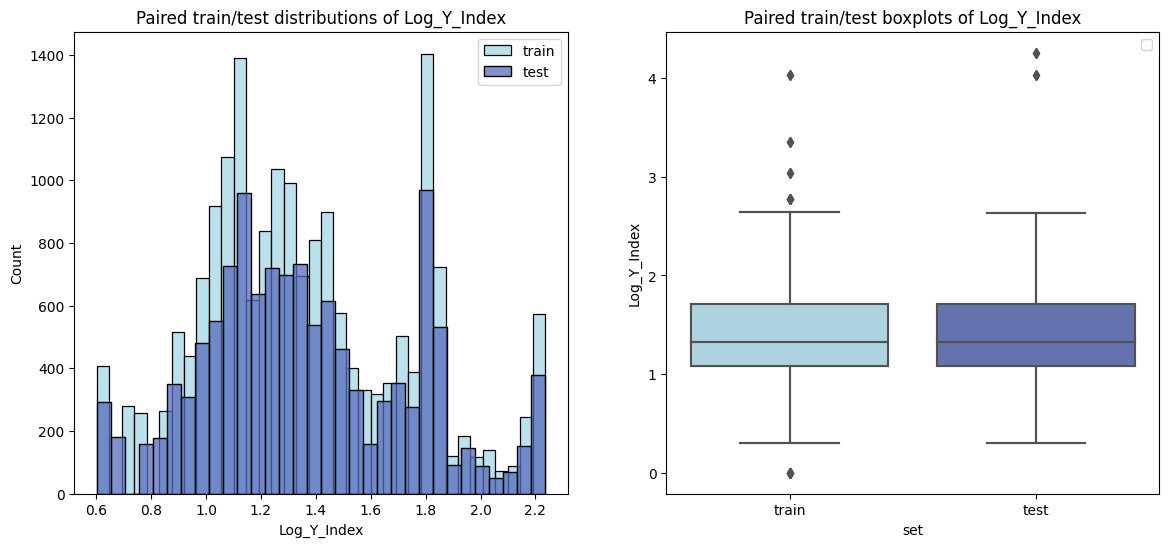

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


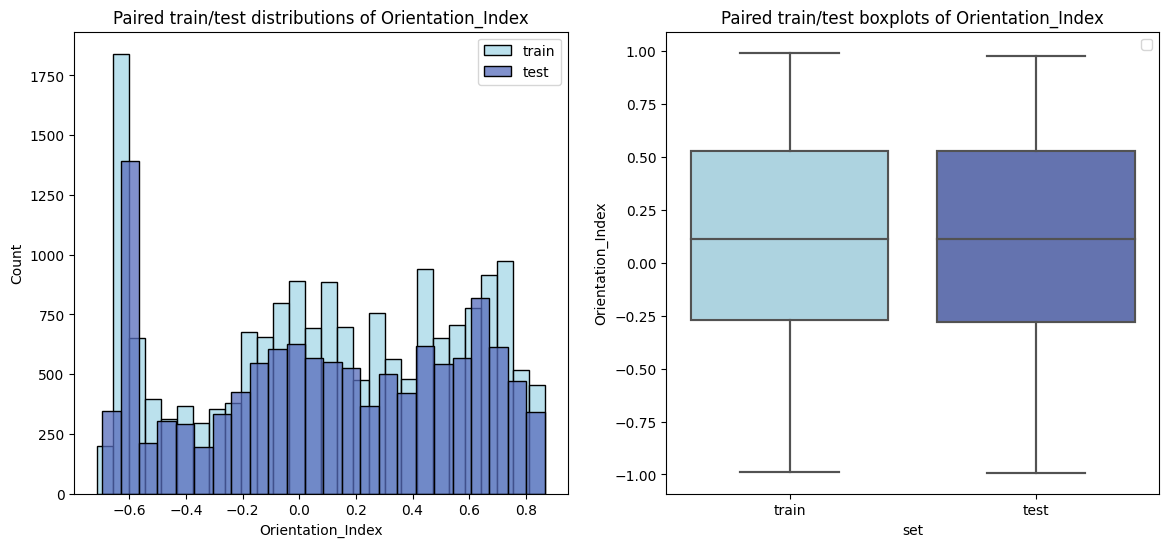

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


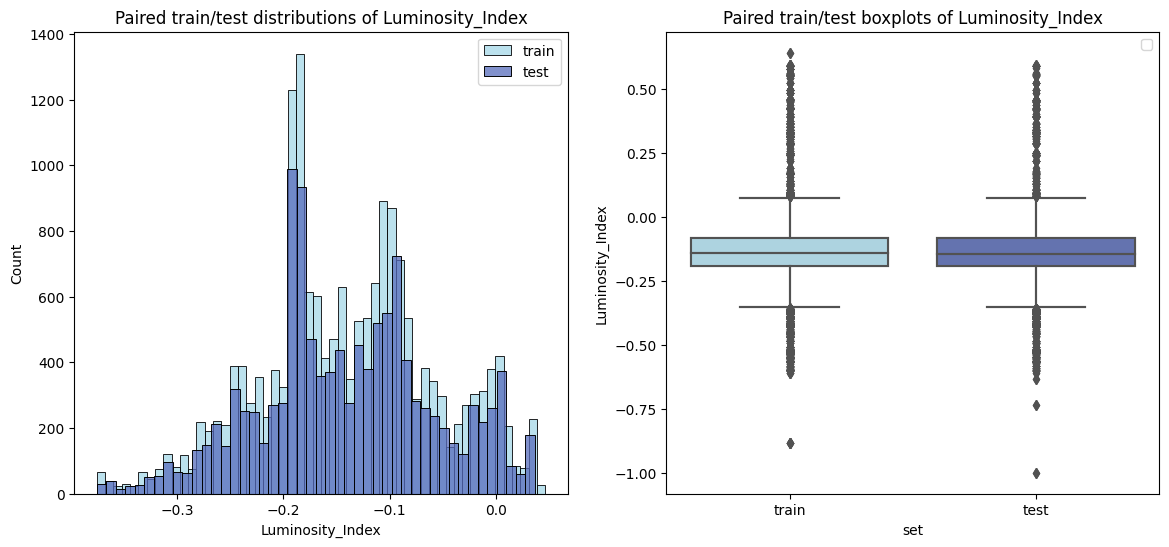

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


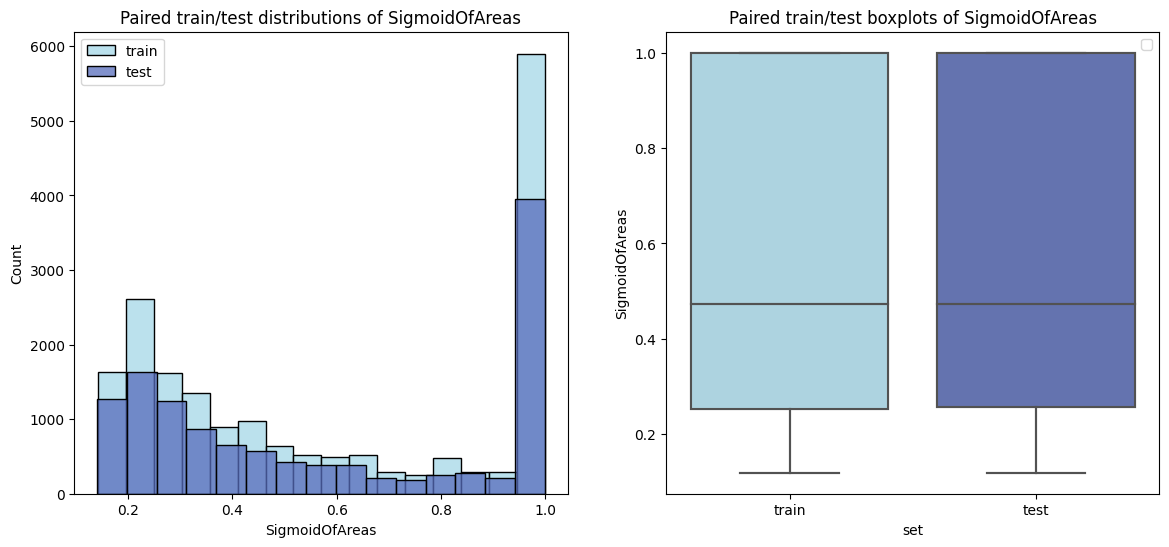

In [30]:
import warnings

def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, test.copy()]).fillna('test')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, axes = plt.subplots(1, 2, figsize=(14, 6))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        # Filter 'selection' to include only the central 95% of the data
        q_025, q_975 = np.percentile(selection, [2.5, 97.5])
        selection_filtered = selection[(selection >= q_025) & (selection <= q_975)]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            sns.histplot(selection_filtered, color=palette[i], ax=axes[0], label=s)
            sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
    axes[0].set_title(f"Paired train/test distributions of {feature}")
    axes[1].set_title(f"Paired train/test boxplots of {feature}")
    axes[0].legend()
    axes[1].legend()
    plt.show()

    
for feature in train.columns:
    plot_distribution_pairs(train, test, feature, palette=color_list)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

X =  pd.concat([train, test], axis=0)
y = [0] * len(train) + [1] * len(test)

model = RandomForestClassifier(random_state=0)
cv_preds = cross_val_predict(model, X, y, cv=5, n_jobs=-1, method='predict_proba')

score = roc_auc_score(y_true=y, y_score=cv_preds[:,1])
print(f"roc-auc score: {score:0.3f}")

roc-auc score: 0.496


In [32]:
def calculate_coordinate_range_features(data):
    data['X_Range'] = (data['X_Maximum'] - data['X_Minimum'])
    data['Y_Range'] =( data['Y_Maximum'] - data['Y_Minimum'])
    return data

train = calculate_coordinate_range_features(train)
test = calculate_coordinate_range_features(test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


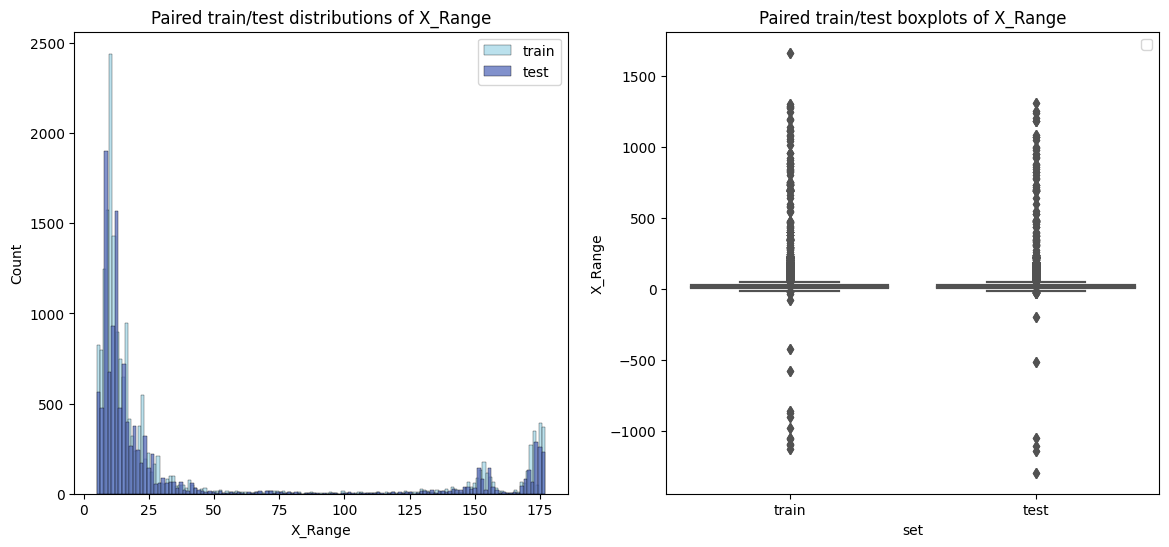

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


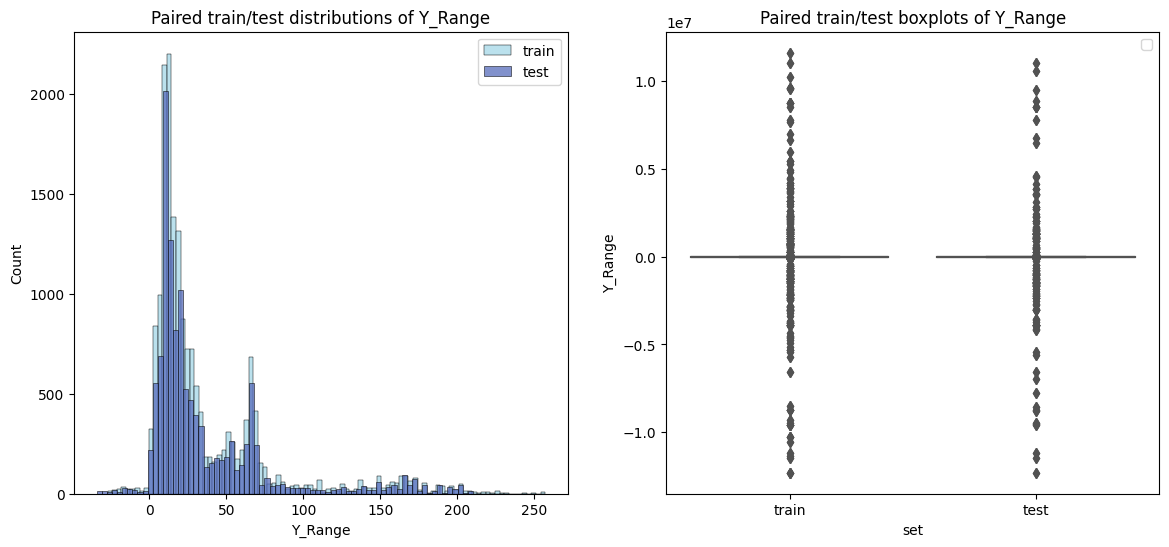

In [33]:
plot_distribution_pairs(train, test, feature="X_Range", palette=color_list)
plot_distribution_pairs(train, test, feature="Y_Range", palette=color_list)

In [34]:
def calculate_size_ratio_features(data):
    data['Area_Perimeter_Ratio'] = data['Pixels_Areas'] / (data['X_Perimeter'] + data['Y_Perimeter'])
    return data

train = calculate_size_ratio_features(train)
test = calculate_size_ratio_features(test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


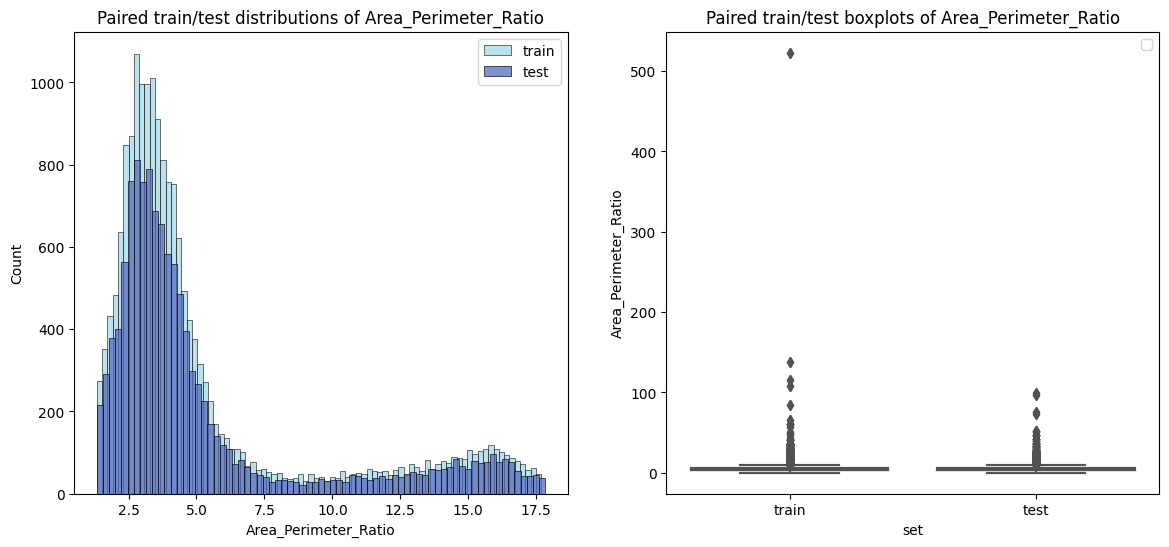

In [35]:
plot_distribution_pairs(train, test, feature="Area_Perimeter_Ratio", palette=color_list)

In [36]:
def calculate_luminosity_range_feature(data):
    data['Luminosity_Range'] = (data['Maximum_of_Luminosity'] - data['Minimum_of_Luminosity'])
    return data

train = calculate_luminosity_range_feature(train)
test = calculate_luminosity_range_feature(test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


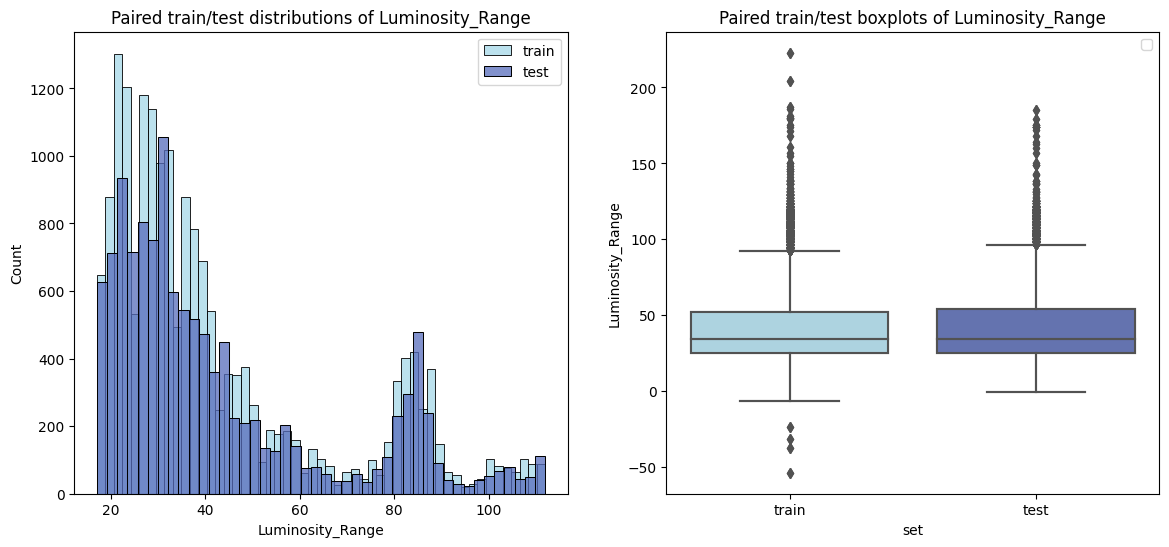

In [37]:
plot_distribution_pairs(train, test, feature="Luminosity_Range", palette=color_list)

In [38]:
train.to_csv("train.csv")
test.to_csv("test.csv")

In [39]:
pd.Series(target, name="target").to_csv("target.csv")

In [40]:
from sklearn.preprocessing import MinMaxScaler

train = train.astype(np.float64)
test = test.astype(np.float64)

mmscaler = MinMaxScaler()

mmscaler.fit(train)

train[:] = mmscaler.transform(train)
test[:] = mmscaler.transform(test)

In [41]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5, shuffle=True, random_state=0)
cv_splits = cv.split(train, y=target)

In [42]:
list(cv_splits)

[(array([    0,     2,     3, ..., 19216, 19217, 19218]),
  array([    1,     9,    23, ..., 19196, 19201, 19213])),
 (array([    0,     1,     2, ..., 19215, 19216, 19218]),
  array([    7,     8,    20, ..., 19194, 19195, 19217])),
 (array([    0,     1,     2, ..., 19216, 19217, 19218]),
  array([    3,    10,    11, ..., 19205, 19211, 19215])),
 (array([    0,     1,     2, ..., 19214, 19215, 19217]),
  array([    5,     6,    18, ..., 19209, 19216, 19218])),
 (array([    1,     3,     5, ..., 19216, 19217, 19218]),
  array([    0,     2,     4, ..., 19210, 19212, 19214]))]

In [43]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
from xgboost import XGBClassifier

cv_splits = cv.split(train, y=target)
roc_auc_scores = list()
cv_oof = pd.DataFrame(np.zeros((len(target), len(target_classes))), columns=target_classes)

for train_idx, val_idx in cv_splits:
    
    xgb = XGBClassifier(booster='gbtree',
                        device = "cuda",
                        tree_method="hist",
                        objective='multi:softmax',  # 'multi:softmax' or 'multi:softprob' for multiclass classification
                        num_class=len(set(target)),  # Number of classes
                        n_estimators=300,
                        max_depth=6,
                        verbosity=0)

    X_train_fold, X_val_fold = train.iloc[train_idx], train.iloc[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]
    
    xgb.fit(X_train_fold, y_train_fold)
    
    y_val_prob = xgb.predict_proba(X_val_fold)
    # We compute the validation score on the original multilabel targets
    roc_auc = roc_auc_score(targets_bin.iloc[val_idx], y_val_prob[:, 1:], multi_class='ovr')
    
    cv_oof.iloc[val_idx, :] = y_val_prob
    
    roc_auc_scores.append(roc_auc)

# Calculate the ROC AUC score statistics across all folds
roc_auc_mean = np.mean(roc_auc_scores)
roc_auc_std = np.std(roc_auc_scores)
roc_auc_max = np.max(roc_auc_scores)
roc_auc_min = np.min(roc_auc_scores)

print(f'Cross-validated ROC-AUC score: {roc_auc_mean:.3f} +/- {roc_auc_std:.3f}')
print(f'Max ROC-AUC score: {roc_auc_max:.3f}')
print(f'Min ROC-AUC score: {roc_auc_min:.3f}')

Cross-validated ROC-AUC score: 0.872 +/- 0.003
Max ROC-AUC score: 0.876
Min ROC-AUC score: 0.868


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_true=target, 
                            y_pred=np.argmax(cv_oof, axis=1), 
                            target_names=target_classes))

              precision    recall  f1-score   support

Zero_Defects       0.10      0.01      0.01       818
      Pastry       0.37      0.20      0.26      1465
   Z_Scratch       0.61      0.58      0.60      1150
    K_Scatch       0.88      0.90      0.89      3432
      Stains       0.70      0.79      0.75       568
   Dirtiness       0.39      0.15      0.22       485
       Bumps       0.48      0.49      0.49      4761
Other_Faults       0.46      0.58      0.51      6540

    accuracy                           0.56     19219
   macro avg       0.50      0.46      0.47     19219
weighted avg       0.53      0.56      0.54     19219



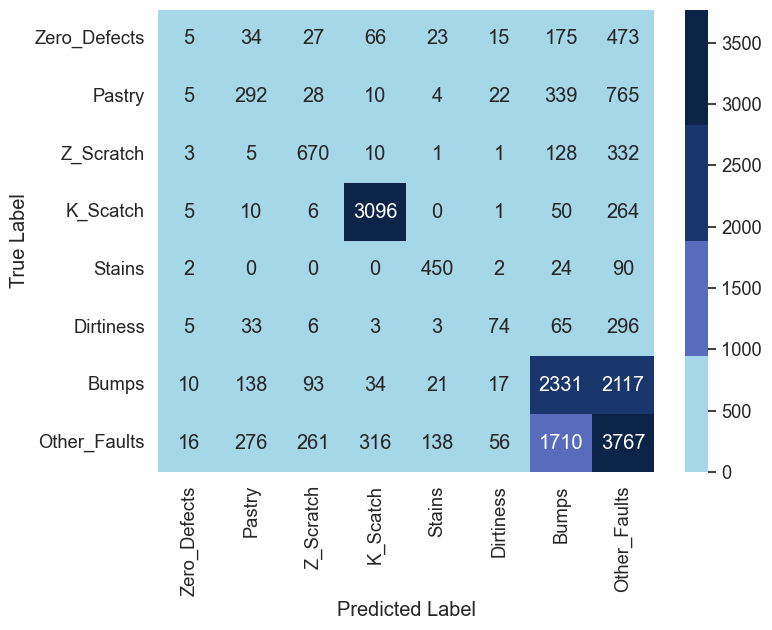

In [45]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=target, 
                               y_pred=np.argmax(cv_oof, axis=1))

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap_custom, 
            xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [46]:
import optuna
from optuna.samplers import TPESampler

# Activate optuna search by setting run_optimization to True
run_optimization = False

def objective(trial):
    params = {
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'gamma' : trial.suggest_float('gamma', 1e-9, 0.5),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 0, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 100.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 100.0, log=True),
        
    }

    params['booster'] = 'gbtree'
    params['objective'] = 'multi:softmax'
    params["device"] = "cuda"
    params["verbosity"] = 0
    params['tree_method'] = "hist"
    

    cv_splits = cv.split(train, y=target)
    cv_scores = list()

    for train_idx, val_idx in cv_splits:
    
        xgb = XGBClassifier(**params)

        X_train_fold, X_val_fold = train.iloc[train_idx], train.iloc[val_idx]
        y_train_fold, y_val_fold = target[train_idx], target[val_idx]

        xgb.fit(X_train_fold, y_train_fold)

        y_val_prob = xgb.predict_proba(X_val_fold)
        cv_scores.append(roc_auc_score(targets_bin.iloc[val_idx], y_val_prob[:, 1:], multi_class='ovr'))

    cv_evaluation = np.mean(cv_scores)
    
    return cv_evaluation

if run_optimization:
    
    sqlite_db = "sqlite:///sqlite.db"
    study_name = "multi_class_prediction_of_obesity_risk"
    study = optuna.create_study(storage=sqlite_db, study_name=study_name, 
                                sampler=TPESampler(n_startup_trials=30, multivariate=True, seed=0),
                                direction="maximize", load_if_exists=True)

    study.optimize(objective, n_trials=100)
    best_cls_params = study.best_params
    best_value = study.best_value

else:
    
    best_value = 0.88887
    best_cls_params = {'grow_policy': 'depthwise', 
                       'n_estimators': 785, 
                       'learning_rate': 0.020726270353596147, 
                       'gamma': 0.13894214878891328, 
                       'subsample': 0.6931112900708679, 
                       'colsample_bytree': 0.5210477365658035, 
                       'max_depth': 3, 
                       'min_child_weight': 2, 
                       'reg_lambda': 5.369876648869387e-06, 
                       'reg_alpha': 8.428323563897863e-09}

print(f"best optmized accuracy: {best_value:0.5f}")
print(f"best hyperparameters: {best_cls_params}")

best_cls_params['objective'] = 'multi:softmax'
best_cls_params['tree_method'] = "hist"
best_cls_params["device"] = "cuda"
best_cls_params["verbosity"] = 0

best optmized accuracy: 0.88887
best hyperparameters: {'grow_policy': 'depthwise', 'n_estimators': 785, 'learning_rate': 0.020726270353596147, 'gamma': 0.13894214878891328, 'subsample': 0.6931112900708679, 'colsample_bytree': 0.5210477365658035, 'max_depth': 3, 'min_child_weight': 2, 'reg_lambda': 5.369876648869387e-06, 'reg_alpha': 8.428323563897863e-09}


In [47]:
from xgboost import XGBClassifier

xgb = xgb = XGBClassifier(**best_cls_params)
xgb.fit(train, target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5210477365658035, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.13894214878891328,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.020726270353596147,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=785, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [53]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = xgb.predict(train)

# Generate classification report
report = classification_report(target, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.01      0.02       818
           1       0.56      0.26      0.35      1465
           2       0.63      0.70      0.66      1150
           3       0.89      0.92      0.91      3432
           4       0.76      0.92      0.83       568
           5       0.61      0.25      0.36       485
           6       0.58      0.55      0.57      4761
           7       0.52      0.66      0.58      6540

    accuracy                           0.62     19219
   macro avg       0.70      0.53      0.54     19219
weighted avg       0.64      0.62      0.60     19219

